In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import plotly.graph_objects as go
from IPython.display import HTML
import sympy as smp
from sympy.vector import cross

phi = np.linspace(0, 2*np.pi, 100)

def l(phi):
    return np.array([np.cos(phi),np.sin(phi),np.zeros(len(phi))])

lx, ly, lz = l(phi)

In [76]:
t, x, y, z = smp.symbols('t, x, y, z')

In [77]:
l=smp.Matrix([smp.cos(t),smp.sin(t),0])
r=smp.Matrix([x,y,z])
sep=r-l

In [78]:
integrand = smp.diff(l,t).cross(sep)/sep.norm()**3

In [79]:
dBxdt=smp.lambdify([t,x,y,z],integrand[0])
dBydt=smp.lambdify([t,x,y,z],integrand[1])
dBzdt=smp.lambdify([t,x,y,z],integrand[2])

In [80]:
def B(x, y, z):
    return np.array([quad(dBxdt, 0, 2*np.pi, args=(x,y,z))[0],
                    quad(dBydt, 0, 2*np.pi, args=(x,y,z))[0],
                    quad(dBzdt, 0, 2*np.pi, args=(x,y,z))[0]])

In [81]:
x= np.linspace(-2,2,20)
xv, yv, zv =np.meshgrid(x,x,x)

In [82]:
B_field=np.vectorize(B, signature='(),(),()->(n)')(xv,yv,zv)
Bx=B_field[:,:,:,0]
By=B_field[:,:,:,1]
Bz=B_field[:,:,:,2]

In [83]:
t2 = smp.symbols('t2', positive=True)
x2, y2, z2 = smp.symbols('x2 y2 z2')


In [84]:
r2 = smp.Matrix([x2, y2, z2])
r_p = smp.Matrix([smp.cos(t2), smp.sin(t2), 0])
sep2 = r2 - r_p

In [85]:
dr_pdt = smp.diff(r_p, t2).norm().simplify()
lam = smp.integrate(dr_pdt, (t2, 0, 2*smp.pi))
lam

2*pi

In [86]:
integrand2 = lam * sep2/sep2.norm()**3 * dr_pdt
integrand2

Matrix([
[2*pi*(x2 - cos(t2))/(Abs(z2)**2 + Abs(x2 - cos(t2))**2 + Abs(y2 - sin(t2))**2)**(3/2)],
[2*pi*(y2 - sin(t2))/(Abs(z2)**2 + Abs(x2 - cos(t2))**2 + Abs(y2 - sin(t2))**2)**(3/2)],
[            2*pi*z2/(Abs(z2)**2 + Abs(x2 - cos(t2))**2 + Abs(y2 - sin(t2))**2)**(3/2)]])

In [87]:
dExdt = smp.lambdify([t2, x2, y2, z2], integrand2[0])
dEydt = smp.lambdify([t2, x2, y2, z2], integrand2[1])
dEzdt = smp.lambdify([t2, x2, y2, z2], integrand2[2])

In [88]:
def E(x2, y2, z2):
    return np.array([quad(dExdt, 0, 2*np.pi, args=(x2, y2, z2))[0],
                     quad(dEydt, 0, 2*np.pi, args=(x2, y2, z2))[0],
                     quad(dEzdt, 0, 2*np.pi, args=(x2, y2, z2))[0]])

In [89]:
x2 = np.linspace(-2, 2, 10)
y2 = np.linspace(-2, 2, 10)
z2 = np.linspace(0, 2*np.pi, 10)
xv2, yv2, zv2 = np.meshgrid(x2, y2, z2)

In [90]:
E_field = np.vectorize(E, signature='(),(),()->(m)')(xv2, yv2, zv2)
Ex = E_field[:,:,:,0]
Ey = E_field[:,:,:,1]
Ez = E_field[:,:,:,2]

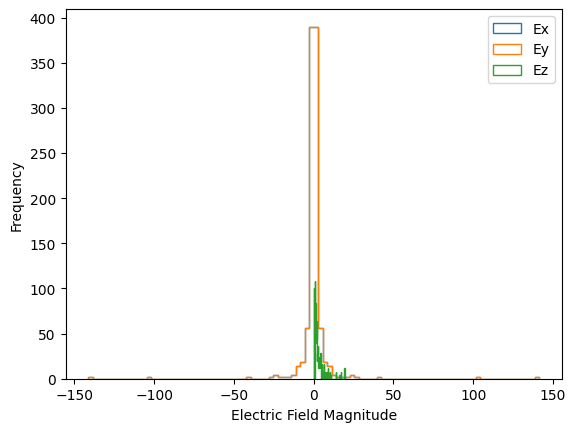

In [91]:
plt.hist(Ex.ravel(), bins=100, histtype='step',label='Ex')
plt.hist(Ey.ravel(), bins=100, histtype='step',label='Ey')
plt.hist(Ez.ravel(), bins=100, histtype='step',label='Ez')
plt.legend()
plt.xlabel('Electric Field Magnitude')
plt.ylabel('Frequency')
plt.show()

In [92]:
E_max = 40
Ex[Ex>E_max] = E_max
Ey[Ey>E_max] = E_max
Ez[Ez>E_max] = E_max

Ex[Ex<-E_max] = -E_max
Ey[Ey<-E_max] = -E_max
Ez[Ez<-E_max] = -E_max

In [93]:
tt = np.linspace(0, 2*np.pi, 1000)
lx2, ly2, lz2 = np.cos(tt), np.sin(tt), np.zeros(1000)

In [94]:
data2 = go.Cone(x=xv2.ravel(), y=yv2.ravel(), z=zv2.ravel(),
               u=Ex.ravel(), v=Ey.ravel(), w=Ez.ravel(),
               colorscale='Blues',
               sizemode="scaled", sizeref=0.5)
layout2 = go.Layout(title=r'Pole Elektryczne',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                aspectratio=dict(x=1, y=1, z=0.3),
                                camera_eye=dict(x=0.4, y=0.4, z=0.55)))

In [104]:
data=go.Cone(x=xv.ravel(),y=yv.ravel(), z=zv.ravel(),
        u=Bx.ravel(), v=By.ravel(), w=Bz.ravel(),
        colorscale="Inferno",
        sizemode='absolute', sizeref=20)

layout=go.Layout(title=r'Pole Magnetyczne', scene=dict(xaxis_title=r'x', yaxis_title=r'y',
            zaxis_title=r'z', aspectratio=dict(x=1, y=1, z=1), camera_eye=dict(x=0.35, y=0.35, z=0.25)))


# dataP=go.Data([data,data2])
# fig=go.Figure(data=dataP, layout=layout)
fig=go.Figure(data=data, layout=layout)
# fig=go.Figure(data=data2, layout=layout2)
fig.add_scatter3d(x=lx, y=ly, z=lz, mode='lines',
            line=dict(color='green',width=10))